In [2]:
#데이터 불러오기 yahoo finance에서 데이터 다운로드후 3일 5일 가격이평선 추가

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [3]:
raw_df = pd.read_csv('./data/005930.KS_3MA_5MA.csv') #yahoo finance로 부터 데이터 다운로드
raw_df.head()
# raw_df = pd.read_csv('./data/005930.KS.csv') #yahoo finance로 부터 데이터 다운로드
# raw_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4740.119629,74195000.0,NaN,NaN
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4328.947754,74680000.0,NaN,NaN
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4359.979492,54390000.0,4476.348958,NaN
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4297.916992,40305000.0,4328.948079,NaN
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4476.349121,46880000.0,4378.081868,4440.662598


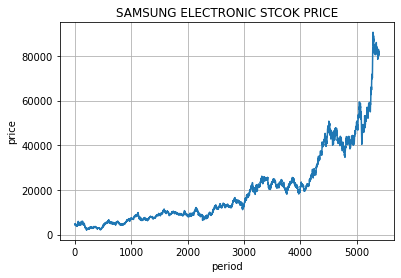

In [4]:
plt.title('SAMSUNG ELECTRONIC STCOK PRICE')
plt.ylabel('price')
plt.xlabel('period')
plt.grid()

plt.plot(raw_df['Adj Close'], label='Adj Close')
plt.show()

In [5]:
# 통계정보 확인
raw_df.describe()

,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
count,5389.000000,5389.000000,5389.000000,5389.000000,5389.000000,5.389000e+03,5393.000000,5391.000000
mean,22801.887178,23043.991464,22559.285582,22801.909445,19920.044863,2.207838e+07,19934.224878,19925.585966
std,17736.201238,17906.827402,17572.109940,17733.296811,17322.636387,1.564053e+07,17313.297249,17292.697383
min,2540.000000,2760.000000,2420.000000,2730.000000,2117.926025,0.000000e+00,2164.473877,2179.989746
25%,9880.000000,9990.000000,9800.000000,9900.000000,7726.937988,1.185265e+07,7726.939453,7709.871631
50%,15760.000000,15940.000000,15560.000000,15800.000000,12808.596680,1.803935e+07,12802.806970,12809.314840
75%,29280.000000,29560.000000,29000.000000,29280.000000,24566.556640,2.771475e+07,24558.166020,24555.269140
max,90300.000000,96800.000000,89500.000000,91000.000000,90597.414060,1.642150e+08,90033.252600,89562.014060


In [6]:
#Missing Data 확인
raw_df.isnull().sum()

Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
3MA          2
5MA          4
dtype: int64

In [7]:
#최소값이 0인 column확인
for col in raw_df.columns:
    if raw_df[col].min() == 0:
        col_name = col
        print(col_name, type(col_name))

Volume <class 'str'>


In [8]:
raw_df.loc[raw_df['Volume']==0]

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
23,2000-02-04,5130.0,5130.0,5130.0,5130.0,3979.839355,0.0,4010.871419,4097.760644
41,2000-03-01,5120.0,5120.0,5120.0,5120.0,3972.081543,0.0,3889.329834,3914.672510
66,2000-04-05,6800.0,6800.0,6800.0,6800.0,5275.420410,0.0,5353.000163,5345.242773
72,2000-04-13,6910.0,6910.0,6910.0,6910.0,5360.757324,0.0,5409.891439,5495.746680
84,2000-05-01,6000.0,6000.0,6000.0,6000.0,4654.781250,0.0,4499.622070,4443.765039
...,...,...,...,...,...,...,...,...,...
4623,2018-04-30,53000.0,53000.0,53000.0,53000.0,47819.117190,0.0,47560.473960,46736.421880
4624,2018-05-02,53000.0,53000.0,53000.0,53000.0,47819.117190,0.0,47819.117190,47194.763280
4625,2018-05-03,53000.0,53000.0,53000.0,53000.0,47819.117190,0.0,47819.117190,47663.931250
5077,2020-03-09,56500.0,56500.0,56500.0,56500.0,53774.468750,0.0,54186.897140,53983.855470


In [9]:
raw_df.loc[raw_df['Open'].isna()]

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
1304,2005-01-03,NaN,NaN,NaN,NaN,NaN,NaN,6989.931152,6910.412353
4513,2017-11-16,NaN,NaN,NaN,NaN,NaN,NaN,49382.673830,49719.997070
4518,2017-11-23,NaN,NaN,NaN,NaN,NaN,NaN,49373.792970,49324.969730
4542,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,44927.763670,44190.302730
4755,2018-11-15,NaN,NaN,NaN,NaN,NaN,NaN,40569.835940,40775.886720
5000,2019-11-14,NaN,NaN,NaN,NaN,NaN,NaN,49695.419920,49364.432620


In [10]:
#Volume 값 0을 NaN 으로 모두 대체(replace)
raw_df['Volume'] = raw_df['Volume'].replace(0,np.nan)

#각 column에 0 갯수 확인
for col in raw_df.columns:
    missing_rows = raw_df.loc[raw_df[col]==0].shape[0]
    print(col +': '+str(missing_rows))

Date: 0
Open: 0
High: 0
Low: 0
Close: 0
Adj Close: 0
Volume: 0
3MA: 0
5MA: 0


In [11]:
# Missing Value 삭제 확인
raw_df.isnull().sum()

Date           0
Open           6
High           6
Low            6
Close          6
Adj Close      6
Volume       122
3MA            2
5MA            4
dtype: int64

In [12]:
#null값 포함된 column 찾기
raw_df.isnull().any()

Date         False
Open          True
High          True
Low           True
Close         True
Adj Close     True
Volume        True
3MA           True
5MA           True
dtype: bool

In [13]:
#모든 Missing Value 삭제
raw_df = raw_df.dropna()
raw_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
3MA          0
5MA          0
dtype: int64

In [14]:
raw_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4476.349121,46880000.0,4378.081868,4440.662598
5,2000-01-11,5820.0,6100.0,5770.0,5770.0,4476.349121,59745000.0,4416.871745,4387.908496
6,2000-01-12,5610.0,5740.0,5600.0,5720.0,4437.559082,29220000.0,4463.419108,4409.630762
7,2000-01-13,5600.0,5740.0,5560.0,5710.0,4429.801270,41190000.0,4447.903158,4423.595117
8,2000-01-14,5720.0,5880.0,5680.0,5830.0,4522.897461,49375000.0,4463.419271,4468.591211


In [15]:
#정규화(Date 제외한 모든 수치부분 정규화) (0-1사이값으로바뀜)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_cols = ['Open','High','Low','Close','Adj Close','Volume','3MA','5MA']
scaled_df = scaler.fit_transform(raw_df[scale_cols])
scaled_df = pd.DataFrame(scaled_df, columns=scale_cols)
print(scaled_df)

          Open      High       Low     Close  Adj Close    Volume       3MA  \
0     0.034868  0.032008  0.036288  0.034440   0.026655  0.285359  0.025192   
1     0.037375  0.035517  0.038470  0.034440   0.026655  0.363715  0.025634   
2     0.034982  0.031689  0.036518  0.033873   0.026217  0.177799  0.026163   
3     0.034868  0.031689  0.036059  0.033760   0.026129  0.250704  0.025987   
4     0.036235  0.033177  0.037437  0.035120   0.027181  0.300555  0.026163   
...        ...       ...       ...       ...        ...       ...       ...   
5264  0.891750  0.830923  0.896647  0.881047   0.885878  0.064088  0.895299   
5265  0.892890  0.834113  0.897795  0.885578   0.890399  0.061199  0.894920   
5266  0.899727  0.841557  0.903537  0.895774   0.900571  0.091190  0.897955   
5267  0.895169  0.835177  0.898944  0.885578   0.890399  0.085145  0.899472   
5268  0.895169  0.833050  0.896647  0.881047   0.885878  0.090683  0.897955   

           5MA  
0     0.025698  
1     0.025094  


In [16]:
# 주가 예측을 위해 시계열 데이터를 만들것이다.
# 입력 파라미터 feature, label => numpy type
def make_sequene_dataset(feature, label, window_size):
    feature_list = [] #생성될 feature list
    label_list = [] #생성될 label list
    
    for i in range(len(feature)-window_size):
        feature_list.append(feature[i:i+window_size])
        label_list.append(label[i+window_size])
        
    return np.array(feature_list),np.array(label_list)

In [17]:
#feature_df,label_df생성
feature_cols = ['3MA','5MA','Adj Close']
label_cols = ['Adj Close']

feature_df = pd.DataFrame(scaled_df, columns=feature_cols)
label_df = pd.DataFrame(scaled_df, columns=label_cols)

In [18]:
label_df.head()

,Adj Close
0,0.026655
1,0.026655
2,0.026217
3,0.026129
4,0.027181


In [19]:
feature_df.head()

,3MA,5MA,Adj Close
0,0.025192,0.025698,0.026655
1,0.025634,0.025094,0.026655
2,0.026163,0.025343,0.026217
3,0.025987,0.025503,0.026129
4,0.026163,0.026018,0.027181


In [20]:
#DataFrame => Numpy 변환
feature_np = feature_df.to_numpy()
label_np = label_df.to_numpy()

print(feature_np.shape,label_np.shape)

(5269, 3) (5269, 1)


In [21]:
# 학습데이터 X, Y  생성
# window_size = 10
window_size = 40
X,Y = make_sequene_dataset(feature_np, label_np, window_size)
print(X.shape, Y.shape)

(5229, 40, 3) (5229, 1)


In [22]:
# split = -30
split = -200

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5029, 40, 3) (5029, 1)
(200, 40, 3) (200, 1)


In [23]:
model = Sequential()

model.add(LSTM(128,activation='tanh',input_shape=x_train[0].shape))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse',optimizer='adam',metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               67584     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 67,713
Trainable params: 67,713
Non-trainable params: 0
_________________________________________________________________


In [24]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=5)

model.fit(x_train, y_train,
         validation_data=(x_test, y_test),
         epochs=300,batch_size=16,
         callbacks=[early_stop])

Epoch 1/300
315/315 [==============================] - 6s 13ms/step - loss: 5.0154e-04 - mae: 0.0095 - val_loss: 0.0013 - val_mae: 0.0274
Epoch 2/300
315/315 [==============================] - 4s 12ms/step - loss: 8.6735e-05 - mae: 0.0060 - val_loss: 0.0012 - val_mae: 0.0266
Epoch 3/300
315/315 [==============================] - 4s 11ms/step - loss: 8.1147e-05 - mae: 0.0060 - val_loss: 9.1469e-04 - val_mae: 0.0223
Epoch 4/300
315/315 [==============================] - 4s 11ms/step - loss: 7.4247e-05 - mae: 0.0056 - val_loss: 4.7918e-04 - val_mae: 0.0163
Epoch 5/300
315/315 [==============================] - 4s 11ms/step - loss: 6.4501e-05 - mae: 0.0053 - val_loss: 4.1277e-04 - val_mae: 0.0150
Epoch 6/300
315/315 [==============================] - 4s 11ms/step - loss: 6.2634e-05 - mae: 0.0053 - val_loss: 4.0549e-04 - val_mae: 0.0141
Epoch 7/300
315/315 [==============================] - 4s 11ms/step - loss: 5.5614e-05 - mae: 0.0049 - val_loss: 4.4222e-04 - val_mae: 0.0172
Epoch 8/300
31

In [25]:
# from datetime import datetime

# start_time = datetime.now()
# hist = model.fit(x_train, y_train,epochs=100,validation_data=(x_test,y_test))
# end_time = datetime.now()

# print('Elapsed Time => ' , end_time-start_time)

In [26]:
pred = model.predict(x_test)
print(pred.shape)

7/7 [==============================] - 0s 6ms/step
(200, 1)


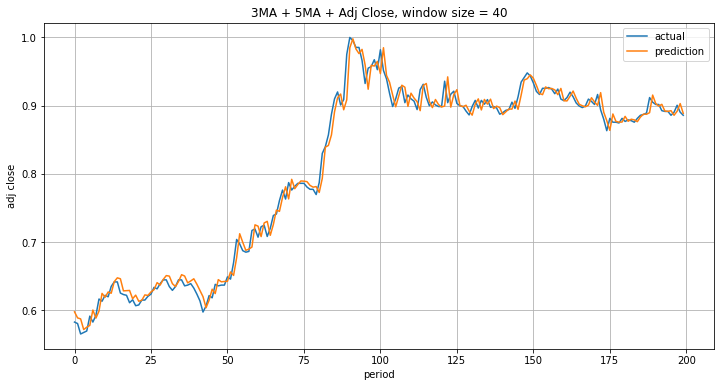

In [27]:
plt.figure(figsize=(12,6))
plt.title('3MA + 5MA + Adj Close, window size = 40')
plt.ylabel('adj close')
plt.xlabel('period')
plt.plot(y_test,label='actual')
plt.plot(pred,label='prediction')
plt.grid()
plt.legend(loc='best')
plt.show()

In [28]:
# 평균절대값백분율오차계산(MAPE)
print(np.sum(abs(y_test-pred)/y_test)/len(x_test))

0.012654567823226097
